In [1]:
import imp
import pandas as pd
import numpy as np
import nltk

import parser
import preprocessing

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100
imp.reload(parser)
imp.reload(preprocessing)
#nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_ru')
# nltk.download('stopwords')

<module 'preprocessing' from '/home/tonko22/PycharmProjects/npo_classification/preprocessing.py'>

In [29]:
df = pd.read_pickle("np_ngo_classification_links.pkl")
print(len(df))
df

197


,Регион,Название организации,ИНН,Год регистрации,Адресс,Возможность пожертвовать деньги на сайте,Возможность обратиться за помощью,Ссылка на сайт,Вид деятельности 1,Вид деятельности 2,...,Вид деятельности 5,Вид деятельности 6,Вид деятельности 7,Вид деятельности 8,Вид деятельности 9,Вид деятельности 10,Вид деятельности 11,Вид деятельности 12,num_sites,web_text
0,Москва,"Межрегиональная общественная благотворительная организация ""Общество защиты прав потребителей и ...",5032173157,2007-07-12,"г Москва, Орехово-Борисово Южное р-н, МКАД 23-й км, д 6",0,0,http://greenstartup.ru/,3_2,6_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,function set_cookie(){var now = new Date();var time = now.getTime();time += 19360000 * 1000;now....
1,Москва,"Межрегиональная благотворительная общественная организация инвалидов ""Общество пациентов с перви...",7702370774,2007-08-28,"г Москва, Мещанский р-н, ул Трифоновская, д 49, оф 41",1,1,http://oppid.ru/,2_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-tra..."
2,Москва,"Некоммерческая организация Благотворительный фонд ""Столица Милосердия""",7702472455,2014-02-11,"г Москва, Мещанский р-н, ул Щепкина, д 9 стр 1",1,1,capital-mercy.ru,1_9,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,html Благотворительный фонд Столица милосердия [if IE 6]>\n<link rel='stylesheet' type='text/css...
3,Москва,"Российский общественный благотворительный фонд ветеранов (пенсионеров) войны, труда и Вооруженны...",7704058560,1998-06-05,"г Москва, р-н Соколиная Гора, ул Щербаковская, д 50/52",1,1,http://www.rbfondveteranov.ru/,1_4,5_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.0 Strict//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dt..."
4,Москва,"Благотворительный фонд ""Фонд Валерия Гергиева""",7709402778,2003-01-27,"г Москва, р-н Арбат, ул Молчановка Б., д 23 к 2",0,0,http://gergiev-charity.com/rus/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD HTML 4.01 Transitional//EN"" ""http://www.w3.org/TR/html4/loose.dtd"" Благ..."
5,Москва,Международный Благотворительный Фонд Владимира Спивакова,7710012370,1994-05-20,"г Москва, Пресненский р-н, Шведский тупик, д 3, оф 17",1,0,http://spivakov.ru/fund/contacts/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Контактная информация и реквизиты | Фонд Спивакова [if lt IE 9]>\n<script src=""http://spiva..."
6,Москва,"Благотворительный фонд поддержки детей с особенностями развития ""Я есть!""",7710479817,2012-05-02,"г Москва, Пресненский р-н, пер Кондратьевский Б., д 4 к 3, оф 29",1,1,http://yaest.ru/,1_7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Главная | Я есть <script src=""http://ajax.googleapis.com/ajax/libs/jquery/1.12.1/jquery.min..."
7,Москва,"Благотворительный фонд помощи бездомным животным ""Ковчег""",7716451494,2014-11-14,"г Москва, Ярославский р-н, Ярославское шоссе, д 2 к 1, кв 157",1,0,http://fond-kovcheg.ru,6_4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Фонд «Ковчег» | Поможем вместе window._wpemojiSettings = {""baseUrl"":""http:\/\/s.w.org\/imag..."
8,Москва,Благотворительный фонд поддержки детей имени императрицы Александры Федоровны Романовой,7701064809,2011-03-22,"105082, ГОРОД МОСКВА, УЛИЦА ФРИДРИХА ЭНГЕЛЬСА, 75, СТР. 3, ОФ. № 1",1,1,http://www.vfonde.ru/,1_7,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.1//EN"" ""http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd"" Áëàãîòâîð..."
9,Москва,"Благотворительный Фонд ""Центр помощи беспризорным детям"" Торгово-промышленной палаты Российской ...",7701295193,2002-03-27,"101000, ГОРОД МОСКВА, БУЛЬВАР ЧИСТОПРУДНЫЙ, 5/10, С.1",1,1,http://www.tppdetfond.ru/,1_3,1_7,...,2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,html if(!window.BX)window.BX={};if(!window.BX.message)window.BX.message=function(mess){if(typeof...


In [3]:
pp = preprocessing.PreprocessingInterface()

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [30]:
pp = preprocessing.PreprocessingInterface()
df["text_normalized"] = df["web_text"].apply(pp.normalize)
df["text_padded"] = df["text_normalized"].apply(pp.pad_punctuation)
df["tokenized"] = df["text_padded"].apply(pp.razdel_tokenize)
df["no_punct"] = df["tokenized"].apply(pp.remove_punct)
df["text_no_stop"] = df["no_punct"].apply(pp.remove_stopwords)
df["preprocessed_tokens"] = df["text_no_stop"].apply(pp.remove_digits)

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [31]:
df["cyrillic_text"] = df["preprocessed_tokens"].apply(pp.filter_non_cyrillic)
df = df[df['cyrillic_text'].astype(str) != '[]']
df.dropna(subset=["cyrillic_text"], inplace=True)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# df[df["cyrillic_text"].map(len)<15][["Ссылка на сайт", "cyrillic_text"]].to_pickle("broken_sites.pkl")
# df[df["cyrillic_text"].map(len)<15][["Ссылка на сайт", "cyrillic_text"]]

In [32]:
# Drop short texts
df = df[df["cyrillic_text"].map(len)>15]

In [597]:
# TODO: Drop empty tokens ""

In [35]:
def filter_tokens_by_len(tokenlist):
    return [t for t in tokenlist if len(t.strip())>1]

In [41]:
def show_short_ones(tokenlist):
    for t in tokenlist:
        if len(t.strip())<2:
            return t

In [44]:
df["lemmatized"] = df["cyrillic_text"].apply(pp.lemmatize_tokens_with_mystem)
df["lemmatized"].replace('', np.nan, inplace=True)
df["preprocessed_tokens"] = df["lemmatized"].apply(filter_tokens_by_len)
df["preprocessed_text"] = df["preprocessed_tokens"].apply(" ".join)
df.dropna(subset=["preprocessed_text"], inplace=True)
df = df[df['preprocessed_text'].astype(str) != '[]']

In [48]:
df = df.reset_index().drop("index", axis=1)

In [49]:
# !git commit -a -m "minor fix, new dataset"

In [50]:
# df.dropna(subset=["preprocessed_tokens"], inplace=True)
pp.stats_for_series(df["preprocessed_text"])

,Total tokens,Unique tokens,Total texts,Empty texts,Empty tokens
Count,1073149,88,176,0,0


In [51]:
df[["preprocessed_text", 
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
  ]].to_pickle("preprocessed_dataset.pkl")

In [177]:
df = pd.read_pickle("preprocessed_dataset.pkl")

In [178]:
def extract_lv_1(category_string):
    if  isinstance(category_string, str):
        if category_string[0]==" ":
            return category_string[1]
        return category_string[0]

In [185]:
# Extracting only lvl 1 categories
target_cols = [
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]
for each in target_cols:
    df[each] = df[each].apply(extract_lv_1)

In [189]:
# Remove duplicates from rows
for index, row in df.iterrows():
    unique_row_values = list(set(row[1:-1]))
    vals = [e for e in unique_row_values if e!=None]
    while len(vals)<12:
        vals.append(None)
    row[1:-1] = vals

# wmd features

In [138]:
from gensim.models.wrappers import FastText
araneum_fasttext_3grams_path  = "/home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model"
araneum_fasttext_3grams = FastText.load(araneum_fasttext_3grams_path)

INFO summarizer.preprocessing.cleaner <module> 'pattern' package not found; tag filters are not available for English
INFO gensim.models.deprecated.old_saveload load loading FastText object from /home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model
DEBUG smart_open.smart_open_lib smart_open {'kw': {}, 'mode': 'rb', 'uri': '/home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model'}
DEBUG smart_open.smart_open_lib encoding_wrapper encoding_wrapper: {'errors': 'strict', 'encoding': None, 'mode': 'rb', 'fileobj': <_io.BufferedReader name='/home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model'>}
INFO gensim.models.deprecated.old_saveload _load_specials loading wv recursively from /home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model.wv.* with mmap=None
INFO gensim.utils _load_specials loading syn0_vocab from /home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model.wv.syn0_vocab.npy with mmap=None
INFO g

In [176]:
from collections import OrderedDict
labels_lv1_map = OrderedDict({
        "1": "социально уязвимые группы населения",
        "2": "медицина", 
        "3": "права человека",
        "4": "культура наука образование",
        "5": "чрезвычайные ситуации конфликты",
        "6": "экология человек природа",
        "7": "развитие гражданского общества",
        "8": "религия",
        "9": "образ жизни",
        "10": "иное"
    })

In [182]:
def compute_wmd(tokenlist):
    features = []
    for each in labels_lv1_map.values():
        wmd = araneum_fasttext_3grams.wmdistance(tokenlist, each.split(" "))
        features.append(wmd)
    return np.array(features, dtype=np.float64)

tokens = df["preprocessed_text"].apply(lambda x: x.split(" "))
df["wmd"] = tokens.apply(compute_wmd)

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(95 unique tokens: ['автор', 'англ', 'больной', 'буклет', 'валентина']...) from 2 documents (total 169 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(92 unique tokens: ['автор', 'англ', 'больной', 'буклет', 'валентина']...) from 2 documents (total 166 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(93 unique tokens: ['автор', 'англ', 'больной', 'буклет', 'валентина']...) from 2 documents (total 167 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Diction

INFO gensim.corpora.dictionary add_documents built Dictionary(171 unique tokens: ['адмирал', 'активный', 'акция', 'беда', 'благо']...) from 2 documents (total 265 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(89 unique tokens: ['азиатский', 'архив', 'бельгия', 'благотворительный', 'валерий']...) from 2 documents (total 155 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(86 unique tokens: ['азиатский', 'архив', 'бельгия', 'благотворительный', 'валерий']...) from 2 documents (total 152 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(87 unique tokens: ['азиатский', 'архив', 'бельгия', 'благотворительн

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(224 unique tokens: ['актер', 'алферов', 'анастасия', 'артемий', 'берой']...) from 2 documents (total 315 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(223 unique tokens: ['актер', 'алферов', 'анастасия', 'артемий', 'берой']...) from 2 documents (total 315 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(223 unique tokens: ['актер', 'алферов', 'анастасия', 'артемий', 'берой']...) from 2 documents (total 315 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents buil

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(643 unique tokens: ['август', 'агитация', 'административный', 'администрация', 'адресат']...) from 2 documents (total 1665 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(646 unique tokens: ['август', 'агитация', 'административный', 'администрация', 'адресат']...) from 2 documents (total 1665 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(645 unique tokens: ['август', 'агитация', 'административный', 'администрация', 'адресат']...) from 2 documents (total 1665 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens:

INFO gensim.corpora.dictionary add_documents built Dictionary(184 unique tokens: ['адлерский', 'административный', 'акция', 'александр', 'альберт']...) from 2 documents (total 286 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(185 unique tokens: ['адлерский', 'административный', 'акция', 'александр', 'альберт']...) from 2 documents (total 287 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(186 unique tokens: ['адлерский', 'административный', 'акция', 'александр', 'альберт']...) from 2 documents (total 288 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(186 unique tokens: ['адлерский', 'административ

INFO gensim.corpora.dictionary add_documents built Dictionary(144 unique tokens: ['адаптация', 'адаптированный', 'адаптировать', 'альпийский', 'баннер']...) from 2 documents (total 230 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(144 unique tokens: ['адаптация', 'адаптированный', 'адаптировать', 'альпийский', 'баннер']...) from 2 documents (total 230 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(144 unique tokens: ['адаптация', 'адаптированный', 'адаптировать', 'альпийский', 'баннер']...) from 2 documents (total 230 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(142 unique tokens: ['адаптация',

INFO gensim.corpora.dictionary add_documents built Dictionary(514 unique tokens: ['абилитация', 'авдотья', 'автоматически', 'адамант', 'адаптироваться']...) from 2 documents (total 992 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 2 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(513 unique tokens: ['абилитация', 'авдотья', 'автоматически', 'адамант', 'адаптироваться']...) from 2 documents (total 991 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(51 unique tokens: ['альбом', 'благотворительный', 'ветеран', 'видео', 'возрождение']...) from 2 documents (total 138 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 u

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(488 unique tokens: ['август', 'агидель', 'аграрный', 'адрес', 'акбузат']...) from 2 documents (total 934 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 2 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(487 unique tokens: ['август', 'агидель', 'аграрный', 'адрес', 'акбузат']...) from 2 documents (total 934 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 2 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(487 unique tokens: ['август', 'агид

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 20 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(810 unique tokens: ['абдуллин', 'август', 'автоматический', 'авторитет', 'аделин']...) from 2 documents (total 1862 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 20 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(811 unique tokens: ['абдуллин', 'август', 'автоматический', 'авторитет', 'аделин']...) from 2 documents (total 1863 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 20 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding d

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(180 unique tokens: ['акт', 'акция', 'альтернатива', 'андрей', 'антонов']...) from 2 documents (total 294 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(180 unique tokens: ['акт', 'акция', 'альтернатива', 'андрей', 'антонов']...) from 2 documents (total 294 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(180 unique tokens: ['акт', 'акция', 'альтернатива', 'андрей', 'антонов']...) from 2 documents (total 294 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents buil

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(221 unique tokens: ['авторизация', 'адрес', 'акция', 'ао', 'банк']...) from 2 documents (total 425 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(221 unique tokens: ['авторизация', 'адрес', 'акция', 'ао', 'банк']...) from 2 documents (total 425 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(220 unique tokens: ['авторизация', 'адрес', 'акция', 'ао', 'банк']...) from 2 documents (total 425 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(221 u

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(140 unique tokens: ['абы', 'адаптация', 'активно', 'артем', 'бездомный']...) from 2 documents (total 336 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(141 unique tokens: ['абы', 'адаптация', 'активно', 'артем', 'бездомный']...) from 2 documents (total 337 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(141 unique tokens: ['абы', 'адаптация', 'активно', 'артем', 'бездомный']...) from 2 documents (total 337 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents buil

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(230 unique tokens: ['адрес', 'анастасия', 'анатольевна', 'анна', 'благо']...) from 2 documents (total 386 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(231 unique tokens: ['адрес', 'анастасия', 'анатольевна', 'анна', 'благо']...) from 2 documents (total 387 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(230 unique tokens: ['адрес', 'анастасия', 'анатольевна', 'анна', 'благо']...) from 2 documents (total 386 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents b

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(228 unique tokens: ['авг', 'акция', 'александр', 'александрович', 'алкоголизм']...) from 2 documents (total 479 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(229 unique tokens: ['авг', 'акция', 'александр', 'александрович', 'алкоголизм']...) from 2 documents (total 479 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(227 unique tokens: ['авг', 'акция', 'александр', 'александрович', 'алкоголизм']...) from 2 documents (total 477 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictiona

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(227 unique tokens: ['агент', 'агентство', 'активист', 'активный', 'акция']...) from 2 documents (total 359 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(226 unique tokens: ['агент', 'агентство', 'активист', 'активный', 'акция']...) from 2 documents (total 359 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(227 unique tokens: ['агент', 'агентство', 'активист', 'активный', 'акция']...) from 2 documents (total 359 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_document

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(100 unique tokens: ['адресный', 'алиса', 'банк', 'бик', 'благотворительный']...) from 2 documents (total 188 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(100 unique tokens: ['адресный', 'алиса', 'банк', 'бик', 'благотворительный']...) from 2 documents (total 188 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(99 unique tokens: ['адресный', 'алиса', 'банк', 'бик', 'благотворительный']...) from 2 documents (total 188 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_doc

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(76 unique tokens: ['адрес', 'александр', 'благотворительный', 'великий', 'видео']...) from 2 documents (total 109 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(77 unique tokens: ['адрес', 'александр', 'благотворительный', 'великий', 'видео']...) from 2 documents (total 110 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(78 unique tokens: ['адрес', 'александр', 'благотворительный', 'великий', 'видео']...) from 2 documents (total 111 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.di

INFO gensim.corpora.dictionary add_documents built Dictionary(79 unique tokens: ['артист', 'аутизм', 'безвозмездный', 'бескорыстный', 'благотворитель']...) from 2 documents (total 118 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(261 unique tokens: ['августин', 'аврелий', 'адресный', 'активно', 'активный']...) from 2 documents (total 449 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(259 unique tokens: ['августин', 'аврелий', 'адресный', 'активно', 'активный']...) from 2 documents (total 446 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(260 unique tokens: ['августин', 'аврелий', 'адресный', 'акт

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(102 unique tokens: ['адрес', 'аодкб', 'аробо', 'архангельский', 'база']...) from 2 documents (total 141 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(101 unique tokens: ['адрес', 'аодкб', 'аробо', 'архангельский', 'база']...) from 2 documents (total 140 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(106 unique tokens: ['автор', 'адрес', 'билет', 'благотворительность', 'благотворительный']...) from 2 documents (total 235 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary ad

INFO gensim.corpora.dictionary add_documents built Dictionary(149 unique tokens: ['автомобиль', 'айта', 'акция', 'арсений', 'банковский']...) from 2 documents (total 235 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(148 unique tokens: ['автомобиль', 'айта', 'акция', 'арсений', 'банковский']...) from 2 documents (total 235 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 1 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(149 unique tokens: ['автомобиль', 'айта', 'акция', 'арсений', 'банковский']...) from 2 documents (total 235 corpus positions)
IN

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(449 unique tokens: ['аварийный', 'авиабилет', 'администрация', 'аксенов', 'активист']...) from 2 documents (total 713 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 13 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(447 unique tokens: ['аварийный', 'авиабилет', 'администрация', 'аксенов', 'активист']...) from 2 documents (total 710 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 13 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(448 uni

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(276 unique tokens: ['август', 'акварельный', 'акцентировать', 'альбом', 'бачатский']...) from 2 documents (total 401 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(275 unique tokens: ['август', 'акварельный', 'акцентировать', 'альбом', 'бачатский']...) from 2 documents (total 401 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(276 unique tokens: ['август', 'акварельный', 'акцентировать', 'альбом', 'бачатский']...) from 2 documents (total 401 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.c

INFO gensim.corpora.dictionary add_documents built Dictionary(116 unique tokens: ['абиотрофия', 'акция', 'астотический', 'атонически', 'барда']...) from 2 documents (total 217 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 2 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(115 unique tokens: ['абиотрофия', 'акция', 'астотический', 'атонически', 'барда']...) from 2 documents (total 216 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(257 unique tokens: ['абонент', 'автомобиль', 'адрес', 'алажилль', 'алена']...) from 2 documents (total 424 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensi

INFO gensim.corpora.dictionary add_documents built Dictionary(139 unique tokens: ['авт', 'автобусный', 'автомобильный', 'автошкола', 'администрация']...) from 2 documents (total 231 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(140 unique tokens: ['авт', 'автобусный', 'автомобильный', 'автошкола', 'администрация']...) from 2 documents (total 232 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(140 unique tokens: ['авт', 'автобусный', 'автомобильный', 'автошкола', 'администрация']...) from 2 documents (total 232 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(140 unique tokens: ['авт', 'автобусный', 

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(131 unique tokens: ['автор', 'алкоголик', 'армия', 'артминистереть', 'библиотека']...) from 2 documents (total 174 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(130 unique tokens: ['автор', 'алкоголик', 'армия', 'артминистереть', 'библиотека']...) from 2 documents (total 173 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(444 unique toke

INFO gensim.corpora.dictionary add_documents built Dictionary(385 unique tokens: ['автоматизация', 'автор', 'адвит', 'адрес', 'аккаунт']...) from 2 documents (total 1076 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(384 unique tokens: ['автоматизация', 'автор', 'адвит', 'адрес', 'аккаунт']...) from 2 documents (total 1074 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(385 unique tokens: ['автоматизация', 'автор', 'адвит', 'адрес', 'аккаунт']...) from 2 documents (total 1075 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(384 unique tokens: ['автоматизация', 'автор', 'адвит', 'адрес', 'аккаунт']...

INFO gensim.corpora.dictionary add_documents built Dictionary(643 unique tokens: ['автобус', 'азовский', 'азовскийдди', 'азы', 'акварель']...) from 2 documents (total 1087 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 9 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(640 unique tokens: ['автобус', 'азовский', 'азовскийдди', 'азы', 'акварель']...) from 2 documents (total 1084 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 9 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(641 unique tokens: ['автобус', 'азовский', 'азовскийдди', 'азы', 'акварель']...) from 2 documents (total 1085 corpus positio

INFO gensim.corpora.dictionary add_documents built Dictionary(236 unique tokens: ['агентство', 'алиса', 'алтай', 'ана', 'аполлинер']...) from 2 documents (total 319 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 16 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(233 unique tokens: ['агентство', 'алиса', 'алтай', 'ана', 'аполлинер']...) from 2 documents (total 316 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 16 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(234 unique tokens: ['агентство', 'алиса', 'алтай', 'ана', 'аполлинер']...) from 2 documents (total 317 corpus positions)
INFO gensim.mod

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(383 unique tokens: ['авторский', 'альтернатива', 'америка', 'артц', 'банк']...) from 2 documents (total 584 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(384 unique tokens: ['авторский', 'альтернатива', 'америка', 'артц', 'банк']...) from 2 documents (total 585 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dicti

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(178 unique tokens: ['автоспорт', 'альбом', 'анатольевич', 'база', 'благо']...) from 2 documents (total 294 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(179 unique tokens: ['автоспорт', 'альбом', 'анатольевич', 'база', 'благо']...) from 2 documents (total 295 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Diction

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(396 unique tokens: ['агаларова', 'аганин', 'актер', 'алексей', 'алла']...) from 2 documents (total 902 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(397 unique tokens: ['агаларова', 'аганин', 'актер', 'алексей', 'алла']...) from 2 documents (total 903 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(398 unique tokens: ['агаларова', 'агани

INFO gensim.corpora.dictionary add_documents built Dictionary(750 unique tokens: ['авация', 'август', 'автограф', 'автомастерская', 'автор']...) from 2 documents (total 1616 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 8 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(751 unique tokens: ['авация', 'август', 'автограф', 'автомастерская', 'автор']...) from 2 documents (total 1617 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 8 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(750 unique tokens: ['авация', 'август', 'автограф', 'автомастерская', 'автор']...) from 2 documents (total 1618 corpus p

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(95 unique tokens: ['аватар', 'адресный', 'аюрведический', 'банк', 'благой']...) from 2 documents (total 148 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(95 unique tokens: ['аватар', 'адресный', 'аюрведический', 'банк', 'благой']...) from 2 documents (total 148 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(94 unique tokens: ['аватар', 'адресный', 'аюрведический', 'банк', 'благой']...) from 2 documents (total 148 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_docum

INFO gensim.corpora.dictionary add_documents built Dictionary(483 unique tokens: ['август', 'адаптация', 'адрес', 'адресный', 'активно']...) from 2 documents (total 1106 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(484 unique tokens: ['август', 'адаптация', 'адрес', 'адресный', 'активно']...) from 2 documents (total 1106 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(482 unique tokens: ['август', 'адаптация', 'адрес', 'адресный', 'активно']...) from 2 documents (total 1104 corpus positions)
IN

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 23 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(345 unique tokens: ['август', 'автомобиль', 'автопомощь', 'администратор', 'адреналин']...) from 2 documents (total 589 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 23 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(343 unique tokens: ['август', 'автомобиль', 'автопомощь', 'администратор', 'адреналин']...) from 2 documents (total 587 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 23 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents 

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(609 unique tokens: ['абсолютный', 'авто', 'адресник', 'активный', 'акция']...) from 2 documents (total 1021 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(607 unique tokens: ['абсолютный', 'авто', 'адресник', 'активный', 'акция']...) from 2 documents (total 1019 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(607 unique tokens: ['абсолютн

INFO gensim.corpora.dictionary add_documents built Dictionary(591 unique tokens: ['абонент', 'ад', 'адрес', 'акклюзионный', 'активный']...) from 2 documents (total 1326 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(590 unique tokens: ['абонент', 'ад', 'адрес', 'акклюзионный', 'активный']...) from 2 documents (total 1324 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(591 unique tokens: ['абонент', 'ад', 'адрес', 'акклюзионный', 'активный']...) from 2 documents (total 1325 corpus positions)
INFO 

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(444 unique tokens: ['адресат', 'актер', 'активист', 'акция', 'алина']...) from 2 documents (total 861 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(445 unique tokens: ['адресат', 'актер', 'активист', 'акция', 'алина']...) from 2 documents (total 862 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 uniq

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(67 unique tokens: ['аэрофлот', 'благотворительный', 'ввод', 'власть', 'воткинский']...) from 2 documents (total 275 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(68 unique tokens: ['аэрофлот', 'благотворительный', 'ввод', 'власть', 'воткинский']...) from 2 documents (total 276 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding docu

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(438 unique tokens: ['авагян', 'австралия', 'автор', 'адрес', 'академический']...) from 2 documents (total 1410 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(439 unique tokens: ['авагян', 'австралия', 'автор', 'адрес', 'академический']...) from 2 documents (total 1411 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(795 unique tokens: ['абсолютный', 'автор', 'авторство', 'азия', 'айвика']...) from 2 documents (total 1517 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(796 unique tokens: ['абсолютный', 'автор', 'авторство', 'азия', 'айвика']...) from 2 documents (total 1518 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(795 unique tokens: ['абсолютный

INFO gensim.corpora.dictionary add_documents built Dictionary(550 unique tokens: ['агентство', 'администратор', 'адрес', 'акварель', 'активный']...) from 2 documents (total 1001 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(551 unique tokens: ['агентство', 'администратор', 'адрес', 'акварель', 'активный']...) from 2 documents (total 1002 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(550 unique tokens: ['агентство', 'администратор', 'адрес', 'акварель', 'активный']...) from 2 documents (total 1

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(384 unique tokens: ['адаптироваться', 'администрация', 'адрес', 'активно', 'акция']...) from 2 documents (total 689 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(383 unique tokens: ['адаптироваться', 'администрация', 'адрес', 'активно', 'акция']...) from 2 documents (total 688 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding docu

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 25 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(297 unique tokens: ['администр', 'администратор', 'адрес', 'активный', 'алкоголизм']...) from 2 documents (total 747 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 25 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(296 unique tokens: ['администр', 'администратор', 'адрес', 'активный', 'алкоголизм']...) from 2 documents (total 746 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding 

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 3 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(1648 unique tokens: ['абидуй', 'август', 'авиабилет', 'авиакомпания', 'автоматизировать']...) from 2 documents (total 8488 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 3 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(1648 unique tokens: ['абидуй', 'август', 'авиабилет', 'авиакомпания', 'автоматизировать']...) from 2 documents (total 8487 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 10 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_docume

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(118 unique tokens: ['абаджян', 'автоцентр', 'авц', 'акцент', 'акция']...) from 2 documents (total 167 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 16 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(117 unique tokens: ['абаджян', 'автоцентр', 'авц', 'акцент', 'акция']...) from 2 documents (total 166 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(666 unique tokens: ['автоматизированный'

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(388 unique tokens: ['автобус', 'автоклуб', 'акция', 'альбом', 'анализ']...) from 2 documents (total 673 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(387 unique tokens: ['автобус', 'автоклуб', 'акция', 'альбом', 'анализ']...) from 2 documents (total 672 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(696 unique tokens: ['авст', 'автобус'

INFO gensim.corpora.dictionary add_documents built Dictionary(399 unique tokens: ['авиапредприятие', 'администрация', 'адрес', 'акт', 'акция']...) from 2 documents (total 784 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(400 unique tokens: ['авиапредприятие', 'администрация', 'адрес', 'акт', 'акция']...) from 2 documents (total 785 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(399 unique tokens: ['авиапредприятие', 'администрация', 'адрес', 'акт', 'акция']...) from 2 documents (total 786 corpu

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(643 unique tokens: ['адрес', 'ак', 'аккаунт', 'активно', 'альбом']...) from 2 documents (total 1257 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(644 unique tokens: ['адрес', 'ак', 'аккаунт', 'активно', 'альбом']...) from 2 documents (total 1258 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique t

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(10 unique tokens: ['арктика', 'благотворитель', 'благотворительный', 'надежда', 'русский']...) from 2 documents (total 28 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(11 unique tokens: ['арктика', 'благотворитель', 'благотворительный', 'надежда', 'русский']...) from 2 documents (total 29 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(1

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(228 unique tokens: ['абонемент', 'авангард', 'адаптивный', 'администратор', 'активный']...) from 2 documents (total 361 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(228 unique tokens: ['абонемент', 'авангард', 'адаптивный', 'администратор', 'активный']...) from 2 documents (total 362 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(229 u

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(783 unique tokens: ['авторынок', 'адма', 'админ', 'активист', 'акция']...) from 2 documents (total 1549 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(784 unique tokens: ['авторынок', 'адма', 'админ', 'активист', 'акция']...) from 2 documents (total 1550 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(784 unique tokens: ['авторынок', 'адм

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 28 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(270 unique tokens: ['авто', 'агент', 'александр', 'алина', 'аллергия']...) from 2 documents (total 386 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 28 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(271 unique tokens: ['авто', 'агент', 'александр', 'алина', 'аллергия']...) from 2 documents (total 386 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 28 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(451 unique tokens: ['абрамович', 'автокресать', 'адрес', 'адресный', 'акция']...) from 2 documents (total 1403 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(451 unique tokens: ['абрамович', 'автокресать', 'адрес', 'адресный', 'акция']...) from 2 documents (total 1403 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(396 unique tokens: ['автоволонтер', 'агата', 'адаптация', 'администрация', 'адрес']...) from 2 documents (total 746 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(396 unique tokens: ['автоволонтер', 'агата', 'адаптация', 'администрация', 'адрес']...) from 2 documents (total 746 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(395 unique to

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(290 unique tokens: ['адрес', 'акция', 'безвозмездный', 'белоозерский', 'береза']...) from 2 documents (total 495 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(290 unique tokens: ['адрес', 'акция', 'безвозмездный', 'белоозерский', 'береза']...) from 2 documents (total 495 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(886 unique tokens: ['аборт', 'август', 'авдеев', 'автомобиль', 'авторство']...) from 2 documents (total 1590 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(887 unique tokens: ['аборт', 'август', 'авдеев', 'автомобиль', 'авторство']...) from 2 documents (total 1590 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(886 unique tokens: ['аборт'

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(412 unique tokens: ['абонемент', 'автономный', 'администрация', 'аифтул', 'аквагрить']...) from 2 documents (total 631 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(412 unique tokens: ['абонемент', 'автономный', 'администрация', 'аифтул', 'аквагрить']...) from 2 documents (total 631 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents addin

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(528 unique tokens: ['агрессия', 'агузаров', 'адекватно', 'адекватный', 'административный']...) from 2 documents (total 1036 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(527 unique tokens: ['агрессия', 'агузаров', 'адекватно', 'адекватный', 'административный']...) from 2 documents (total 1036 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_docum

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 16 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(335 unique tokens: ['агентство', 'административный', 'аистенок', 'активность', 'алексей']...) from 2 documents (total 513 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 16 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(334 unique tokens: ['агентство', 'административный', 'аистенок', 'активность', 'алексей']...) from 2 documents (total 513 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 16 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_docume

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 20 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(243 unique tokens: ['актер', 'актерский', 'ап', 'аутизм', 'барристер']...) from 2 documents (total 382 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 20 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(243 unique tokens: ['актер', 'актерский', 'ап', 'аутизм', 'барристер']...) from 2 documents (total 383 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 20 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(378 unique tokens: ['азия', 'активно', 'активный', 'актуальный', 'анонс']...) from 2 documents (total 685 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 8 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(379 unique tokens: ['азия', 'активно', 'активный', 'актуальный', 'анонс']...) from 2 documents (total 686 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 8 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(378 unique tokens: ['азия', 'акти

INFO gensim.corpora.dictionary add_documents built Dictionary(144 unique tokens: ['актуарий', 'ассоциация', 'бадминтон', 'бездрожжевой', 'близкий']...) from 2 documents (total 228 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(145 unique tokens: ['актуарий', 'ассоциация', 'бадминтон', 'бездрожжевой', 'близкий']...) from 2 documents (total 229 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(144 unique tokens: ['актуарий', 'ассоциация', 'бадминтон', 'бездрожжевой', 'близкий']...) from 2 documents

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(79 unique tokens: ['антон', 'аутизм', 'благотворительный', 'бф', 'ваш']...) from 2 documents (total 113 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(78 unique tokens: ['антон', 'аутизм', 'благотворительный', 'бф', 'ваш']...) from 2 documents (total 112 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(192 unique tokens: ['аам', 'автолиг

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(159 unique tokens: ['авто', 'агент', 'администратор', 'айболит', 'альбом']...) from 2 documents (total 228 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(160 unique tokens: ['авто', 'агент', 'администратор', 'айболит', 'альбом']...) from 2 documents (total 229 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(160 unique tokens: ['авто', '

INFO gensim.corpora.dictionary add_documents built Dictionary(311 unique tokens: ['авто', 'агата', 'агент', 'адаптивный', 'администратор']...) from 2 documents (total 612 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(313 unique tokens: ['авто', 'агата', 'агент', 'адаптивный', 'администратор']...) from 2 documents (total 613 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(313 unique tokens: ['авто', 'агата', 'агент', 'адаптивный', 'администратор']...) from 2 documents (total 614 corpus position

INFO gensim.corpora.dictionary add_documents built Dictionary(225 unique tokens: ['аврора', 'авто', 'автогородок', 'агент', 'агентство']...) from 2 documents (total 355 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(226 unique tokens: ['аврора', 'авто', 'автогородок', 'агент', 'агентство']...) from 2 documents (total 356 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(227 unique tokens: ['аврора', 'авто', 'автогородок', 'агент', 'агентство']...) from 2 documents (total 357 corpus positions)
INF

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(15 unique tokens: ['будущий', 'вятка', 'наследие', 'ориентировать', 'поддержка']...) from 2 documents (total 24 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(15 unique tokens: ['будущий', 'вятка', 'наследие', 'ориентировать', 'поддержка']...) from 2 documents (total 24 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(15 unique tokens: ['будущий', 'вятка', 'наследие', 'ориентировать', 'поддержка']...) from 2 documents (total 24 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictiona

INFO gensim.corpora.dictionary add_documents built Dictionary(351 unique tokens: ['авто', 'агент', 'агентство', 'администратор', 'актуальный']...) from 2 documents (total 530 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(351 unique tokens: ['авто', 'агент', 'агентство', 'администратор', 'актуальный']...) from 2 documents (total 530 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(350 unique tokens: ['авто', 'агент', 'агентство', 'администратор', 'актуальный']...) from 2 documents (total 528 cor

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 59 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(338 unique tokens: ['авто', 'агент', 'администратор', 'адрес', 'александр']...) from 2 documents (total 634 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 59 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(337 unique tokens: ['авто', 'агент', 'администратор', 'адрес', 'александр']...) from 2 documents (total 632 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 59 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Di

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(257 unique tokens: ['анатольевна', 'анкета', 'аппарель', 'балтийск', 'безо']...) from 2 documents (total 362 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 19 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(255 unique tokens: ['анатольевна', 'анкета', 'аппарель', 'балтийск', 'безо']...) from 2 documents (total 360 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 19 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(256 unique tokens: ['анат

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(985 unique tokens: ['авг', 'австрийский', 'австрия', 'автобусный', 'автомобиль']...) from 2 documents (total 2064 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(983 unique tokens: ['авг', 'австрийский', 'австрия', 'автобусный', 'автомобиль']...) from 2 documents (total 2062 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(984 unique tokens

INFO gensim.corpora.dictionary add_documents built Dictionary(293 unique tokens: ['авто', 'агент', 'администратор', 'администрация', 'адрес']...) from 2 documents (total 461 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(291 unique tokens: ['авто', 'агент', 'администратор', 'администрация', 'адрес']...) from 2 documents (total 459 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(291 unique tokens: ['авто', 'агент', 'администратор', 'администрация', 'адрес']...) from 2 documents (total 460 corpus

INFO gensim.corpora.dictionary add_documents built Dictionary(186 unique tokens: ['абрамян', 'автовокзал', 'администрация', 'адресный', 'алажилль']...) from 2 documents (total 254 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(184 unique tokens: ['абрамян', 'автовокзал', 'администрация', 'адресный', 'алажилль']...) from 2 documents (total 252 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(185 unique tokens: ['абрамян', 'автовокзал', 'администрация', 'адресный', 'алажилль']...) from 2 documents

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 21 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(340 unique tokens: ['авто', 'автор', 'агент', 'администратор', 'акб']...) from 2 documents (total 471 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 21 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(341 unique tokens: ['авто', 'автор', 'агент', 'администратор', 'акб']...) from 2 documents (total 472 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 21 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 u

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 29 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(346 unique tokens: ['авто', 'агент', 'адвокат', 'адвокатский', 'администратор']...) from 2 documents (total 630 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 29 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(347 unique tokens: ['авто', 'агент', 'адвокат', 'адвокатский', 'администратор']...) from 2 documents (total 631 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 29 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document 

INFO gensim.corpora.dictionary add_documents built Dictionary(180 unique tokens: ['анализ', 'ано', 'астрология', 'беда', 'беспокоить']...) from 2 documents (total 236 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(181 unique tokens: ['анализ', 'ано', 'астрология', 'беда', 'беспокоить']...) from 2 documents (total 237 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(180 unique tokens: ['анализ', 'ано', 'астрология', 'беда', 'беспокоить']...) from 2 documents (total 236 corpus positions)
INFO gens

INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(352 unique tokens: ['авто', 'агент', 'администрация', 'адрес', 'акция']...) from 2 documents (total 607 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 31 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(351 unique tokens: ['авто', 'агент', 'администрация', 'адрес', 'акция']...) from 2 documents (total 606 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 12 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(521 unique tokens: ['абаджян', 'аветис', 'авц', 'агпу', 'администрация']...) from 2 documents (total 965 corpus positions)
INFO gensim.models.deprecated.keyedvectors wmdistance Removed 4 and 0 OOV words from document 1 and 2 (respectively).
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(521 unique tokens: ['абаджян', 'аветис', 'авц', 'агпу', 'администрация']...) from 2 documents (total 964 corpus positions)


In [190]:
X = df[["preprocessed_text", "wmd"]]

y = pd.get_dummies(df[[
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]])
y = y.fillna(np.nan).astype(int)
y.shape

(176, 22)

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [195]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    ngram_range=(1, 2),
    max_features=1000)
word_vectorizer.fit(X["preprocessed_text"])

train_word = word_vectorizer.transform(X_train["preprocessed_text"])
test_word = word_vectorizer.transform(X_test["preprocessed_text"])

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='char',
    ngram_range=(2, 6),
    max_features=1000)
char_vectorizer.fit(X["preprocessed_text"])

train_char = char_vectorizer.transform(X_train["preprocessed_text"])
test_char = char_vectorizer.transform(X_test["preprocessed_text"])

In [236]:
X_train["hwmd"] = X_train["wmd"].apply(lambda x: sparse.csc_matrix(x.reshape(1,10)))
X_test["hwmd"] = X_test["wmd"].apply(lambda x: sparse.csc_matrix(x.reshape(1,10)))

ValueError: cannot reshape array of size 10 into shape (1,1000)

In [231]:
train_word[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 105 stored elements in Compressed Sparse Row format>

In [230]:
train_char[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 856 stored elements in Compressed Sparse Row format>

In [234]:
X_train["hwmd"][0]

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Column format>

In [235]:
from scipy.sparse import hstack
train_features = hstack([train_word, train_char, X_train["hwmd"]])
test_features = hstack([test_word, test_char, X_test["hwmd"]])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [220]:
from scipy import sparse
sparse.csc_matrix(X_train["wmd"].loc[0])

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Column format>

In [227]:
train_word[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.0880793 ,
        0.06229199, 0.        , 0.        , 0.        , 0.        ,
        0.06277074, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0997307 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08043987, 0.        , 0.        , 0.        , 0.        ,
        0.10286693, 0.0940135 , 0.        , 0.        , 0.        ,
        0.08611701, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11574903, 0.        , 0.07

In [60]:
train_features.shape

(117, 2000)

In [61]:
df.plot?

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


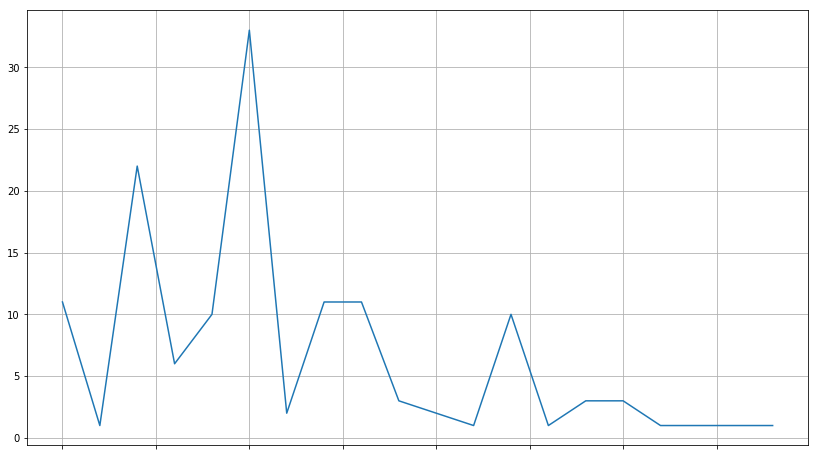

In [62]:
y.ix[:, 2:].sum().plot(figsize=(14,8), grid=True)

# Baseline models

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

clf = KNeighborsClassifier()

k_range = np.arange(1,10)
weight_options = ["uniform", "distance"]
metrics = ['minkowski','euclidean','manhattan']

param_grid = dict(n_neighbors = k_range, weights = weight_options, metric=metrics)
grid = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy") 
grid.fit(train_features, y_train)
print(grid.best_score_) 
print(grid.best_params_)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.6581196581196581
{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [598]:
param_grid

{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [267]:
from sklearn.multiclass import OneVsRestClassifier

In [216]:
def evaluate(clf, test_features, y_test, proba=False):
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

In [ ]:
logreg = LogisticRegression()

In [278]:
def score_one_vs_rest(input_clf, proba=False):
    clf = OneVsRestClassifier(input_clf)
    clf.fit(train_features, y_train)
    evaluate(clf, test_features, y_test)
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

In [600]:
# score_one_vs_rest(KNeighborsClassifier(metric='minkowski', n_neighbors=1, weights='uniform'))
score_one_vs_rest(lgb.LGBMClassifier(silent=False, n_estimators=80, class_weight="balanced"))

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 11 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 12 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 15 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 17 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarni

(0.288135593220339, 0.3590447077289182)

In [604]:
import pprint

def report(clf, test_features, y_test):
    y_pred = clf.predict(test_features)
    return classification_report(y_test, y_pred)

pprint.pprint(report(clf, test_features, y_test))

NotFittedError: Must fit neighbors before querying.